In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_data = pd.merge(city_data_df, ride_data_df, on="city")

# Display the data table for preview
pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [1]:
#build a Bubble Plot that showcases the relationship between four key variables:
# Average Fare ($) Per City
# Total Number of Rides Per City
# Total Number of Drivers Per City
# City Type (Urban, Suburban, Rural)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [3]:
#Find the average fare per city

average_fare = pyber_data.groupby("city")["fare"].mean()
average_fare

city
Amandaburgh             24.641667
Barajasview             25.332273
Barronchester           36.422500
Bethanyland             32.956111
Bradshawfurt            40.064000
Brandonfort             35.437368
Carriemouth             28.314444
Christopherfurt         24.501852
Colemanland             30.894545
Davidfurt               31.995882
Deanville               25.842632
East Aaronbury          25.661111
East Danielview         31.560588
East Kaylahaven         23.757931
East Kentstad           29.823077
East Marymouth          30.835185
Erikaland               24.906667
Garzaport               24.123333
Grahamburgh             25.221200
Grayville               27.763333
Harringtonfort          33.470000
Huntermouth             28.993750
Hurleymouth             25.891429
Jerryton                25.649200
Jessicaport             36.013333
Johnton                 26.785714
Joneschester            22.289600
Josephside              32.858148
Justinberg              23.694333
Karenberg

In [4]:
#Find the total rides per city

total_rides = pyber_data.groupby("city")["ride_id"].count()
total_rides

city
Amandaburgh             18
Barajasview             22
Barronchester           16
Bethanyland             18
Bradshawfurt            10
Brandonfort             19
Carriemouth             27
Christopherfurt         27
Colemanland             22
Davidfurt               17
Deanville               19
East Aaronbury           9
East Danielview         17
East Kaylahaven         29
East Kentstad           13
East Marymouth          27
Erikaland               12
Garzaport                3
Grahamburgh             25
Grayville               15
Harringtonfort           6
Huntermouth             24
Hurleymouth             28
Jerryton                25
Jessicaport              6
Johnton                 21
Joneschester            25
Josephside              27
Justinberg              30
Karenberg               17
                        ..
South Evanton           31
South Jack              19
South Jennifer           7
South Karenland         38
South Latoya            19
South Marychester      

## Bubble Plot of Ride Sharing Data

In [5]:
#Find the total number of drivers per city.

total_drivers = pyber_data.groupby("city")["driver_count"].mean()
total_drivers

city
Amandaburgh             12
Barajasview             26
Barronchester           11
Bethanyland             22
Bradshawfurt             7
Brandonfort             10
Carriemouth             52
Christopherfurt         41
Colemanland             23
Davidfurt               23
Deanville               49
East Aaronbury           7
East Danielview         22
East Kaylahaven         65
East Kentstad           20
East Marymouth           5
Erikaland               37
Garzaport                7
Grahamburgh             61
Grayville                2
Harringtonfort           4
Huntermouth             37
Hurleymouth             36
Jerryton                64
Jessicaport              1
Johnton                 27
Joneschester            39
Josephside              25
Justinberg              39
Karenberg               22
                        ..
South Evanton           11
South Jack              46
South Jennifer           7
South Karenland          4
South Latoya            10
South Marychester      

In [9]:
#Find the city type
city_type = city_data_df.set_index('city')['type']
city_type.value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [11]:
#build a Bubble Plot that showcases the relationship between four key variables:
# Average Fare ($) Per City
# Total Number of Rides Per City
# Total Number of Drivers Per City
# City Type (Urban, Suburban, Rural)
pyber_cities = pd.DataFrame({"Average Fare per City":average_fare,
                             "Number of Rides": total_rides,
                             "Number of Drivers": total_drivers,
                             "City Type": city_type
                            })
pyber_cities.head()

,Average Fare per City,Number of Rides,Number of Drivers,City Type
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


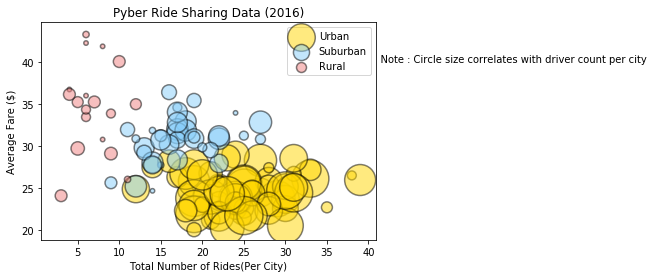

In [20]:
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
# Incorporate the other graph properties

#Urban
urban = pyber_cities.loc[pyber_cities["City Type"]== "Urban"]
plt.scatter(urban["Number of Rides"], urban["Average Fare per City"], color = "gold", edgecolors="black", s = urban["Number of Drivers"]*20, label = "Urban", alpha = 0.5, linewidth = 1.5)

#suburban
suburban = pyber_cities.loc[pyber_cities["City Type"]== "Suburban"]
plt.scatter(suburban["Number of Rides"], suburban["Average Fare per City"], color = "lightskyblue", edgecolors ="black", s = suburban["Number of Drivers"]*20, label = "Suburban", alpha = 0.5, linewidth = 1.5)

#rural
rural = pyber_cities.loc[pyber_cities["City Type"]== "Rural"]
plt.scatter(rural["Number of Rides"], rural["Average Fare per City"], color = "lightcoral", edgecolors = "black", s = rural["Number of Drivers"]*20, label = "Rural", alpha = 0.5, linewidth = 1.5)

#Add title, x axis label and y axis label.
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare ($)")

# Incorporate a text label regarding circle size
plt.text(40, 40,"    Note : Circle size correlates with driver count per city")

# Create a legend
plt.legend(loc= "upper right")

# Show plot
plt.show()


## Total Fares by City Type

In [25]:
# Calculate Type Percents
city_fare_pie = pyber_data.groupby(["type"])["fare"].sum()
city_fare_pie

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [26]:
city_fare_pie.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

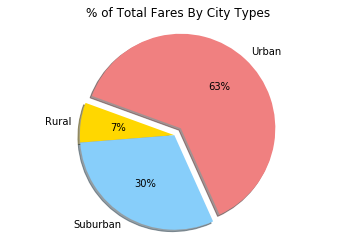

In [47]:
# Build Pie Chart 
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0, 0.1)
plt.pie(city_fare_pie, labels = city_fare_pie.index, autopct = "%1.0f%%", colors = colors, explode = explode, shadow = True, startangle = 160)

#Pie chart with equal axes
plt.axis("equal")

#Add Title
plt.title("% of Total Fares By City Types")

#Add legend
# plt.legend(loc = "upper left")

#Show Chart
plt.show()

## Total Rides by City Type

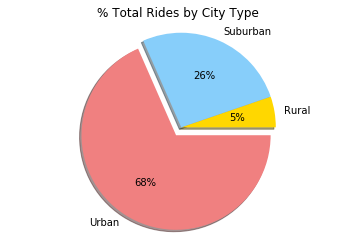

In [45]:
# Calculate Ride Percents
city_rides_pie = pyber_data.groupby(["type"])["ride_id"].count()
city_rides_pie

# Build Pie Chart

city_rides_pie.index
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0, 0.1)
plt.pie(city_rides_pie, labels = city_fare_pie.index, autopct = "%1.0f%%", colors = colors, explode = explode, shadow = True)

#Pie chart with equal axes
plt.axis("equal")

#Add Title
plt.title("% Total Rides by City Type")

#Add legend
# plt.legend(loc = "upper left")

#Show Chart
plt.show()


## Total Drivers by City Type

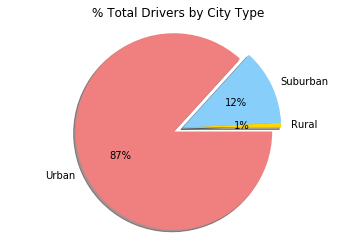

In [51]:
# Calculate Driver Percents

city_drivers_pie = pyber_data.groupby(["type"])["driver_count"].sum()
city_drivers_pie

# Build Pie Charts

city_drivers_pie.index
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.0,0.0,0.1)
plt.pie(city_drivers_pie, labels = city_fare_pie.index, autopct = "%1.0f%%", colors = colors, explode = explode, shadow = True)

#Pie chart with equal axes
plt.axis("equal")

#Add Title
plt.title("% Total Drivers by City Type")

#Add legend
# plt.legend(loc = "upper right")

#Show Chart
plt.show()
